<a href="https://colab.research.google.com/github/Aggarwal13/ML_MODELS/blob/main/SMOTE_EXAMPLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix


In [31]:
df=pd.read_csv("Fraud.csv")

In [32]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490697 entries, 0 to 490696
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            490697 non-null  int64  
 1   type            490697 non-null  object 
 2   amount          490697 non-null  float64
 3   nameOrig        490697 non-null  object 
 4   oldbalanceOrg   490697 non-null  float64
 5   newbalanceOrig  490697 non-null  float64
 6   nameDest        490697 non-null  object 
 7   oldbalanceDest  490697 non-null  float64
 8   newbalanceDest  490696 non-null  float64
 9   isFraud         490696 non-null  float64
 10  isFlaggedFraud  490696 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 41.2+ MB


In [34]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,490697.000000,4.906970e+05,4.906970e+05,4.906970e+05,4.906970e+05,4.906960e+05,490696.000000,490696.0
mean,13.794847,1.670025e+05,9.108310e+05,9.305278e+05,9.824424e+05,1.163724e+06,0.000471,0.0
std,3.676322,2.736069e+05,3.009629e+06,3.046769e+06,2.336777e+06,2.512668e+06,0.021692,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,11.000000,1.340038e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,14.000000,8.165704e+04,1.869117e+04,0.000000e+00,1.181926e+05,2.221823e+05,0.000000,0.0
75%,17.000000,2.235817e+05,1.716460e+05,2.113850e+05,8.952688e+05,1.202339e+06,0.000000,0.0
max,19.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.148270e+07,4.148270e+07,1.000000,0.0


In [35]:
df.drop("type",axis=1,inplace=True)
df.drop("nameOrig",axis=1,inplace=True)
df.drop("nameDest",axis=1,inplace=True)


Removed nameOrig and nameDest because first of all these are the string values or we can say objects and secondly nameOrig and nameDest does not impact the isfraud column

Type column is also a string , although we can convert this categorical data of type in numerical but generally if we give them value 1 2 3 4 and so on then there is a high probability that our model can be wrongly trained as our model can misconfigured these values and can give more weightage to the label which have value 4 then 3 then 2 ans so on.......

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490697 entries, 0 to 490696
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            490697 non-null  int64  
 1   amount          490697 non-null  float64
 2   oldbalanceOrg   490697 non-null  float64
 3   newbalanceOrig  490697 non-null  float64
 4   oldbalanceDest  490697 non-null  float64
 5   newbalanceDest  490696 non-null  float64
 6   isFraud         490696 non-null  float64
 7   isFlaggedFraud  490696 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 29.9 MB


In [37]:
print(df.isnull().sum())

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


In [38]:
df["newbalanceOrig"].fillna(df["newbalanceOrig"].mean(),inplace=True)
df["oldbalanceDest"].fillna(df["oldbalanceDest"].mean(),inplace=True)
df["newbalanceDest"].fillna(df["newbalanceDest"].mean(),inplace=True)
df["isFraud"].fillna(df["newbalanceOrig"].mean(),inplace=True)
df["isFlaggedFraud"].fillna(df["newbalanceOrig"].mean(),inplace=True)


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490697 entries, 0 to 490696
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            490697 non-null  int64  
 1   amount          490697 non-null  float64
 2   oldbalanceOrg   490697 non-null  float64
 3   newbalanceOrig  490697 non-null  float64
 4   oldbalanceDest  490697 non-null  float64
 5   newbalanceDest  490697 non-null  float64
 6   isFraud         490697 non-null  float64
 7   isFlaggedFraud  490697 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 29.9 MB


In [40]:
print(df.isnull().sum())

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [41]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0
2,1,181.00,181.0,0.00,0.0,0.0,1.0,0.0
3,1,181.00,181.0,0.00,21182.0,0.0,1.0,0.0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0


MULTI COLLINARITY


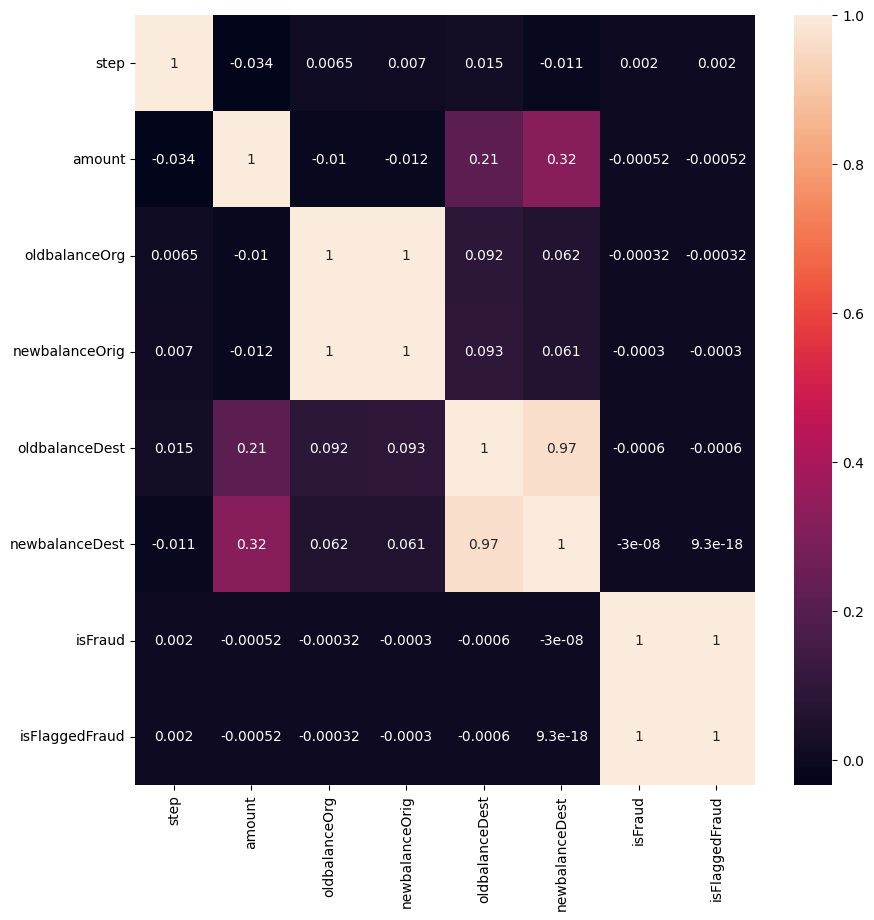

In [42]:
plt.figure(figsize=(10,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

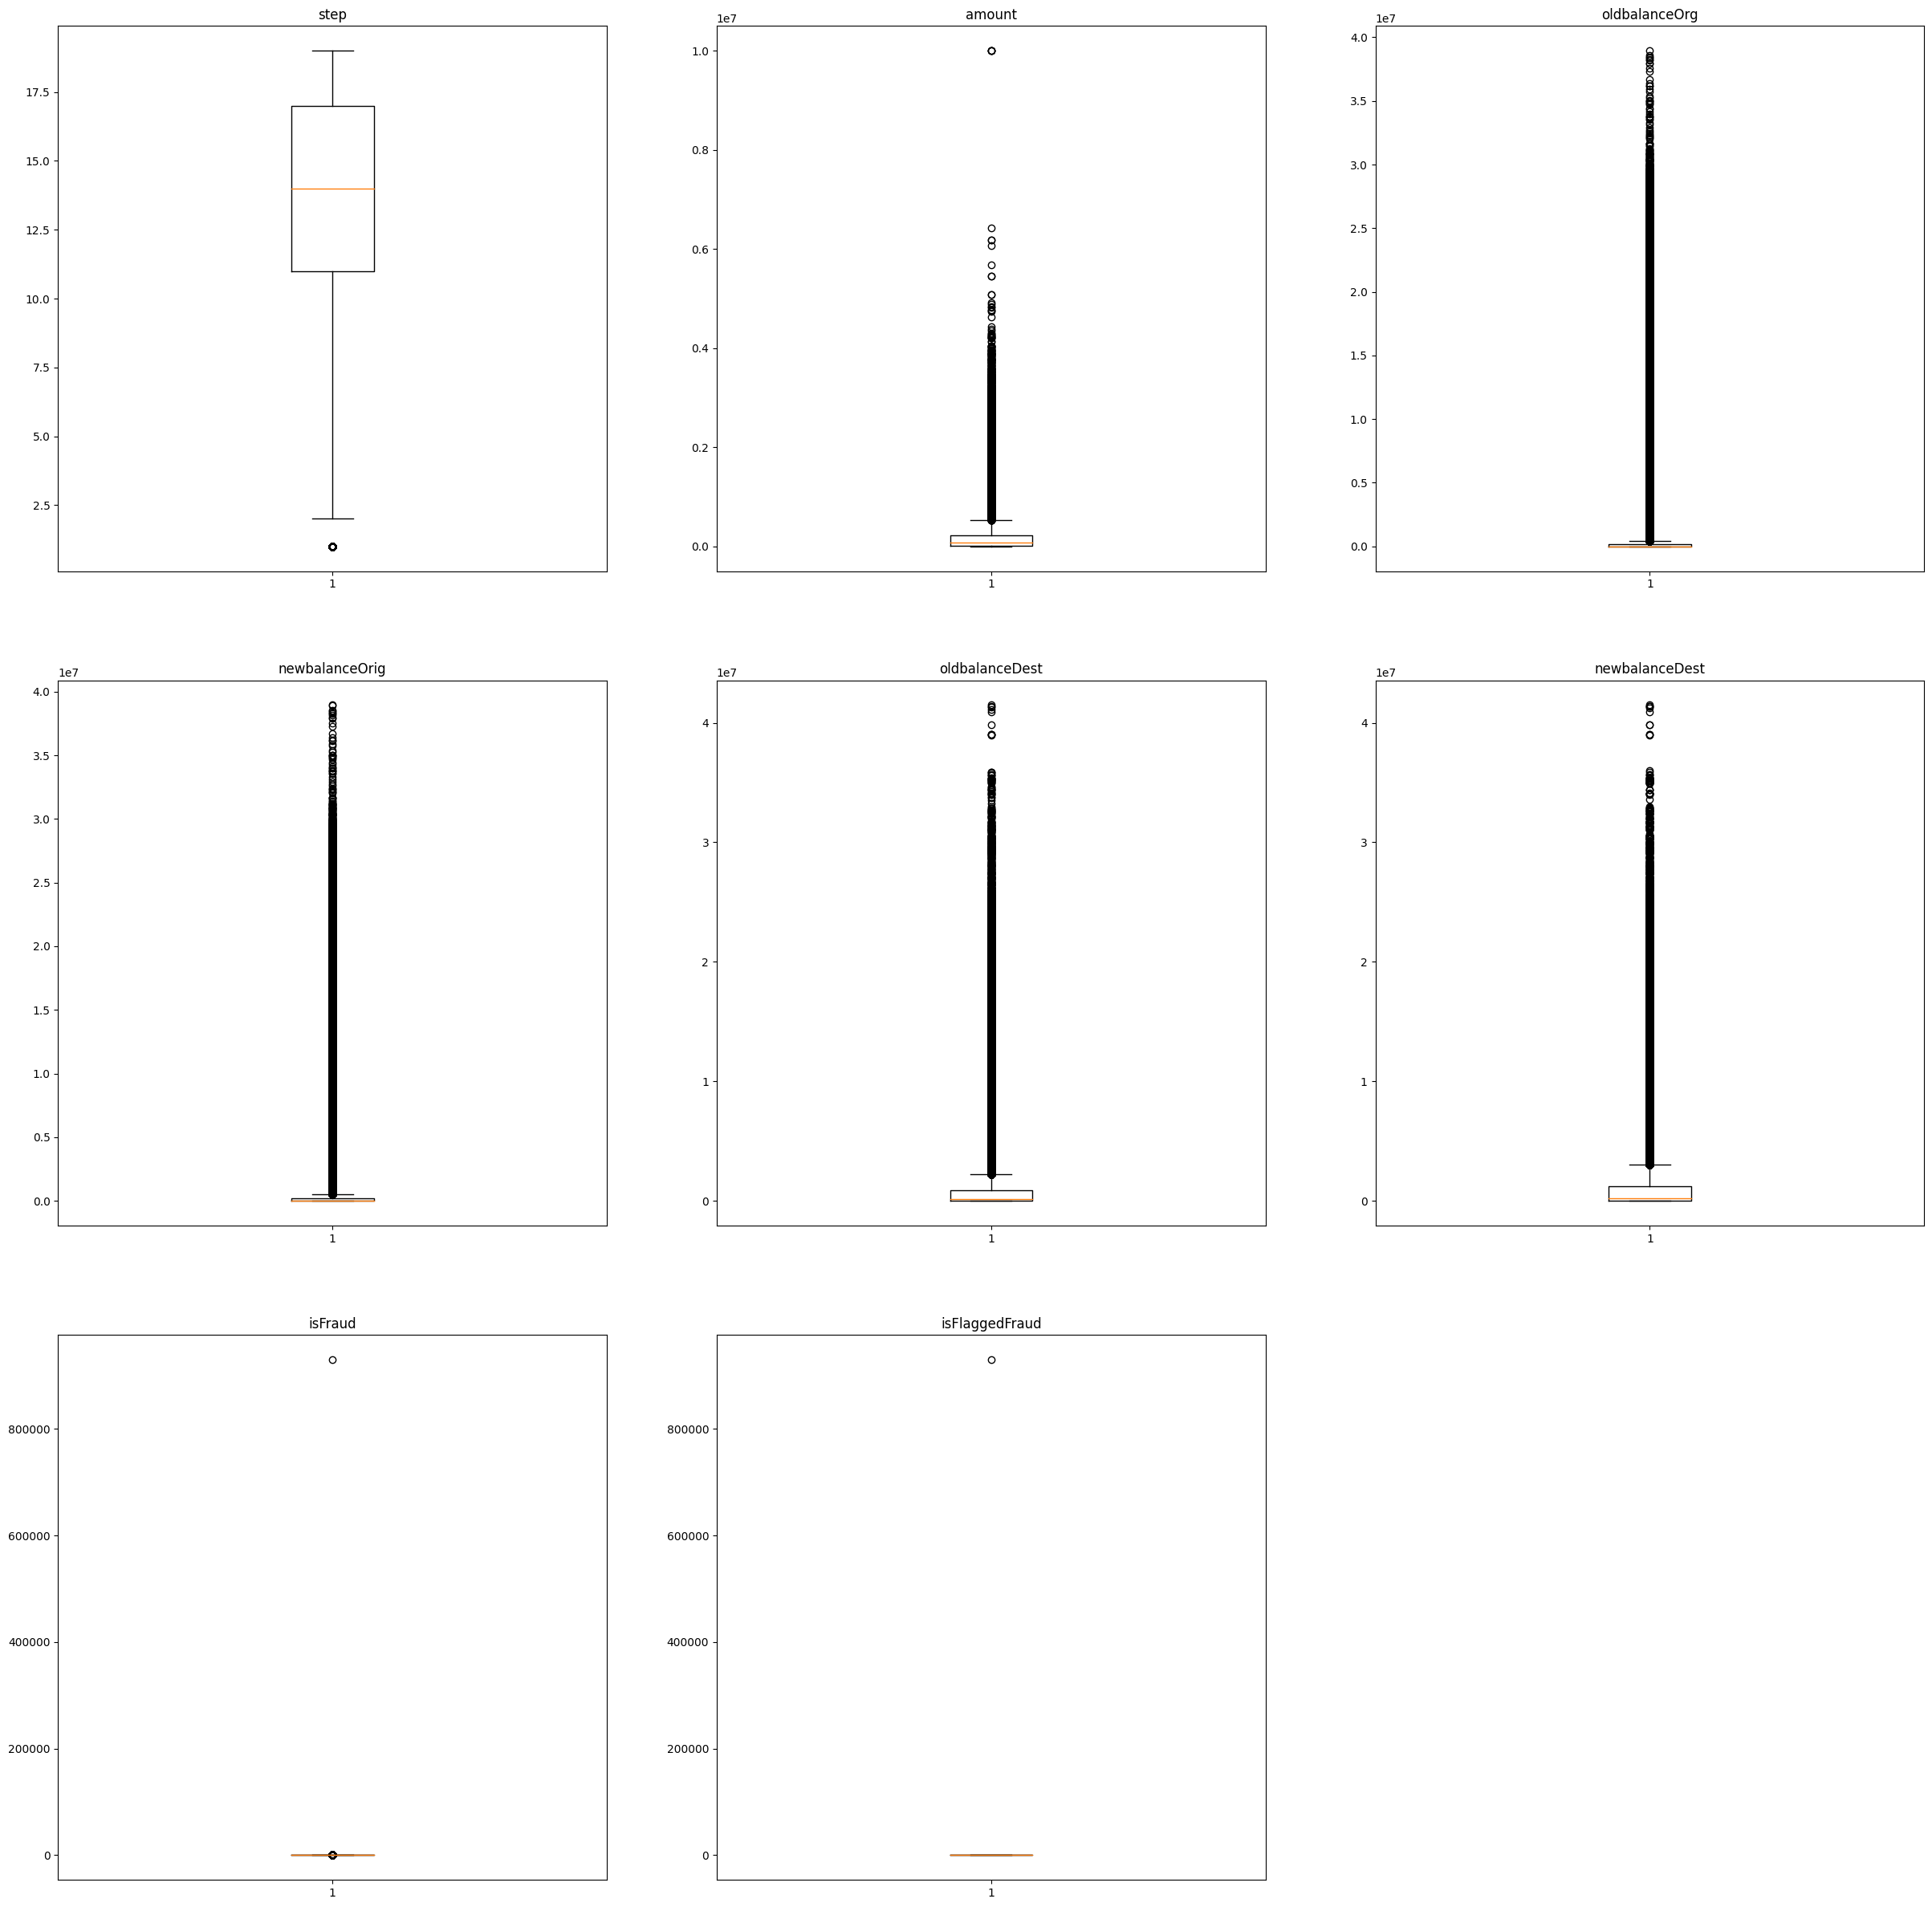

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
for i ,col in enumerate(df.columns):
  if df[col].dtype !='object':
    plt.subplot(3,3,i+1)
    plt.boxplot(df[col])
    plt.title(col)

plt.show()

In [44]:
df['isFraud'] = df['isFraud'].astype(int)

In [45]:
print(df.isnull().sum())

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [46]:
df["amount"].fillna(df["amount"].mean(),inplace=True)
df["oldbalanceOrg"].fillna(df["oldbalanceOrg"].mean(),inplace=True)


In [47]:
print(df.isnull().sum())

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


MODEL BUILDING


In [48]:
features=['step','amount',	'oldbalanceOrg',	'newbalanceOrig',	'oldbalanceDest',	'newbalanceDest','isFlaggedFraud']
x=df[features]
y=df.isFraud

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [51]:
smote = SMOTE(random_state=42, k_neighbors=5)  # Adjust k_neighbors parameter
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [52]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [53]:
y_pred = model.predict(X_test)

In [54]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     98096
           1       0.09      0.51      0.15        43
      930527       0.00      0.00      0.00         1

    accuracy                           1.00     98140
   macro avg       0.36      0.50      0.38     98140
weighted avg       1.00      1.00      1.00     98140

Confusion Matrix:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[97876   220     0]
 [   21    22     0]
 [    1     0     0]]


In [55]:
#DECISION TREE
max_features=3
kfold=model_selection.KFold(n_splits=10)
model=DecisionTreeClassifier(criterion='gini')
results=model_selection.cross_val_score(model,X_train_resampled, y_train_resampled,cv=kfold)
print("acuraccy",round(results.mean()*100,2))

acuraccy 99.81
